### Install libraries

In [1]:
!pip install pandas matplotlib seaborn scikit-learn
!pip install kaggle

In [2]:
!pip install python-dotenv

### Import libraries

In [3]:
import pandas as pd
import joblib
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
import os
from dotenv import load_dotenv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading dataset from Kaggle

In [6]:
!pwd

/content


In [7]:
!ls "/content/drive/My Drive/Colab Notebooks/Datasets"

vehicles_dataset.csv


In [8]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/vehicles_dataset.csv")

### Loading vars and cloning Github Repo

In [9]:
!pwd

/content


In [10]:
!ls /content/

ci-cd-project  drive  sample_data


In [11]:
# remove old version of git repo if it still exists from last time
!rm -rf /content/ci-cd-project

In [12]:
# clone the current repo
!git clone https://github.com/empt22/ci-cd-project.git

Cloning into 'ci-cd-project'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 81 (delta 22), reused 66 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 61.57 KiB | 4.74 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [13]:
%cd /content/ci-cd-project

/content/ci-cd-project


In [14]:
# load environment variables from .env file
load_dotenv("/content/drive/My Drive/Colab Notebooks/config/.env")
token = os.getenv("GITHUB_PAT")
user_name = os.getenv("GIT_USER_NAME")
user_email = os.getenv("GIT_USER_EMAIL")

# Use the token for Git commands
!git remote set-url origin https://{token}@github.com/empt22/ci-cd-project.git

In [15]:
# confirm user identify who is making commits to Github
!git config --global user.name "{user_name}"
!git config --global user.email "{user_email}"

### Data analysis

In [16]:
len(df)

1002

In [17]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


#### Summary stats

In [18]:
df['make'].value_counts().head()

,count
make,
Jeep,194
Hyundai,121
Dodge,117
Ford,88
RAM,79


In [19]:
df['year'].value_counts()

,count
year,
2024,906
2023,90
2025,6


In [20]:
df['mileage'].value_counts()

,count
mileage,
5.0,116
0.0,110
10.0,108
1.0,58
6.0,50
...,...
447.0,1
73.0,1
399.0,1


In [21]:
# checking which columns have null values, and if so, how many
print(df.isnull().sum())

name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


In [22]:
# drop all nulls from mileage, price since those columns will be used in the simple model
df_cleaned = df.dropna(subset=['mileage', 'price'])
df = df_cleaned

#### Fitting a model

In [53]:
# creating predictor and response variables
X = df[['make', 'year', 'mileage']]
y = df['price']

In [54]:
# convert categoricals into 1-0 indicators
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [55]:
X_train.head()

,year,mileage,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,...,make_Lexus,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo
148,2024,11.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
597,2024,15.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
317,2024,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
920,2024,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
890,2024,0.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Evaluating the model

In [59]:
# creating predictions from test data
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 216095891.73100853


In [61]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.4846847564215291


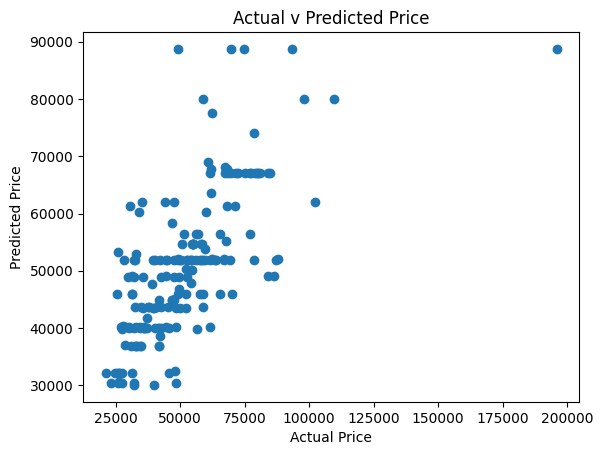

In [63]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual v Predicted Price")
plt.show()

#### Saving the model

In [64]:
print(model)
print(type(model))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [65]:
# Save the trained model
model_file = "linear_model.pkl"
with open(model_file, "wb") as file:
    pickle.dump(model, file)

#joblib.dump(model, 'linear_model.pkl')

# Save the columns list
columns_file = "columns.pkl"
with open(columns_file, "wb") as file:
    pickle.dump(X_train.columns.tolist(), file)

#### Testing the model

In [66]:
# Load the trained model
with open("linear_model.pkl", "rb") as file:
    model_from_pkl = pickle.load(file)

#print(type(model_from_pkl))
#print(model_from_pkl)

# Load the column list
with open("columns.pkl", "rb") as file:
    columns_from_pkl = pickle.load(file)

#print(type(columns_from_pkl))
#print(columns_from_pkl)

#### Point prediction

In [67]:
# Function to change make to dummy and make predictions
def predict_price(mileage, year, make):

    # Create a DataFrame for the input, indicator 1 or 0 for Make
    input_data = {'mileage': mileage, 'year': year, f'make_{make}': 1}
    df_input = pd.DataFrame([input_data])

    # Add missing columns and fill them with 0
    df_input = df_input.reindex(columns=columns_from_pkl, fill_value=0)

    # Predict using the model
    prediction = model_from_pkl.predict(df_input)

    return prediction[0]

In [74]:
# Find average mileage/price for typical Jeep 2024
Jeep_2024 = df[ (df['make'] =="Jeep")  & (df['year'] ==2024) ]
Jeep_2024_price = Jeep_2024["price"].mean()
Jeep_2024_mileage = Jeep_2024["mileage"].mean()

Jeep_2024_pred = predict_price(Jeep_2024_mileage, 2024, "Jeep")

print(f"Jeep 2024 Avg Mileage: {Jeep_2024_mileage}")
print(f"Jeep 2024 Avg Price: {Jeep_2024_price}")
print(f"Jeep 2024 Predicted Price based on Avg Mileage: {Jeep_2024_pred}")

Jeep 2024 Avg Mileage: 39.0
Jeep 2024 Avg Price: 52519.01818181818
Jeep 2024 Predicted Price based on Avg Mileage: 52039.47242733929


In [76]:
# Find average mileage/price for typical Hyundai 2024
Hyundai_2024 = df[ (df['make'] =="Hyundai")  & (df['year'] ==2024) ]
Hyundai_2024_price = Hyundai_2024["price"].mean()
Hyundai_2024_mileage = Hyundai_2024["mileage"].mean()

Hyundai_2024_pred = predict_price(Hyundai_2024_mileage, 2024, "Hyundai")

print(f"Hyundai 2024 Avg Mileage: {Hyundai_2024_mileage}")
print(f"Hyundai 2024 Avg Price: {Hyundai_2024_price}")
print(f"Hyundai 2024 Predicted Price based on Avg Mileage: {Hyundai_2024_pred}")

Hyundai 2024 Avg Mileage: 57.13793103448276
Hyundai 2024 Avg Price: 39543.64655172414
Hyundai 2024 Predicted Price based on Avg Mileage: 40262.73471707618


In [77]:
# User Inputs for Jeep 2024:
mileage = 39
year = 2024
make = "Jeep"

predicted_price = predict_price(mileage, year, make)
predicted_price

52039.47242733929

In [78]:
# User Inputs for Hyundai 2024:
mileage = 57
year = 2024
make = "Hyundai"

predicted_price = predict_price(mileage, year, make)
predicted_price

40262.21761411568

In [38]:
!pwd
!ls

/content/ci-cd-project
data_analysis  linear_model.pkl  README.md  requirements.txt  tests


### Commit to Gibhub

In [39]:
#%cd /content/ci-cd-project/data_analysis
#!pwd
#!ls
#!ls /content/drive/'My Drive'/'Colab Notebooks'
!ls /content/ci-cd-project/data_analysis/

import_data.py	Kaggle_Cars_2024_Data_Summary.ipynb


In [40]:
# copy this file into the Github repo
!cp '/content/drive/My Drive/Colab Notebooks/Kaggle_Cars_2024_Data_Summary.ipynb' /content/ci-cd-project/data_analysis/

In [41]:

#!ll /content/ci-cd-project/data_analysis/

In [42]:
# make the commit of just this notebook
!git add data_analysis/Kaggle_Cars_2024_Data_Summary.ipynb linear_model.pkl
!git commit -m "add .pkl lin reg model"
!git push origin main

[main 19d94da] add .pkl lin reg model
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite data_analysis/Kaggle_Cars_2024_Data_Summary.ipynb (82%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 31.79 KiB | 6.36 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/empt22/ci-cd-project.git
   d038852..19d94da  main -> main


In [ ]:
# end of file